**INF2178 - Experiments With Data**

**Technical Assignment 4**

**Professor Shion Guha**

**Student Name - Fatima Ashfaq**

Student ID - 1010784732

Date Created - 25 March 2024

Date Modified - 4 April 2024

URL Link to Report/Narrative:

https://docs.google.com/document/d/1gZBbwRMEV8ZCsDvG7HTnFTNXHqiBkP6Dy6yDeW8GdM4/edit?usp=sharing

In [1]:
# Mount Google Drive
from google.colab import drive
drive.mount('/drive', force_remount=True)

Mounted at /drive


In [2]:
# Load Required Libraries
import pandas as pd
from scipy import stats as sm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
%pip install pingouin
import pingouin as pg

from statsmodels.stats.power import TTestPower
from statsmodels.stats.power import TTestIndPower
from statsmodels.formula.api import mixedlm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.9/198.9 kB 1.7 MB/s eta 0:00:00


In [3]:
# Load The Dataset
df = pd.read_csv('/drive/MyDrive/INF2178/INF2178_A4_data.csv')
df.head(10)

,Unnamed: 0,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,5,OAS2_0004,OAS2_0004_MR1,Nondemented,1,0,F,R,88,18,3.0,28.0,0.0,1215,0.710,1.444
5,6,OAS2_0004,OAS2_0004_MR2,Nondemented,2,538,F,R,90,18,3.0,27.0,0.0,1200,0.718,1.462
6,7,OAS2_0005,OAS2_0005_MR1,Nondemented,1,0,M,R,80,12,4.0,28.0,0.0,1689,0.712,1.039
7,8,OAS2_0005,OAS2_0005_MR2,Nondemented,2,1010,M,R,83,12,4.0,29.0,0.5,1701,0.711,1.032
8,10,OAS2_0007,OAS2_0007_MR1,Demented,1,0,M,R,71,16,NaN,28.0,0.5,1357,0.748,1.293
9,13,OAS2_0008,OAS2_0008_MR1,Nondemented,1,0,F,R,93,14,2.0,30.0,0.0,1272,0.698,1.380


# Exploratory Data Analysis (EDA)

**Non-Graphical EDA**

In [4]:
df.isnull().sum()

Unnamed: 0     0
Subject ID     0
MRI ID         0
Group          0
Visit          0
MR Delay       0
M/F            0
Hand           0
Age            0
EDUC           0
SES           15
MMSE           1
CDR            0
eTIV           0
nWBV           0
ASF            0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  294 non-null    int64  
 1   Subject ID  294 non-null    object 
 2   MRI ID      294 non-null    object 
 3   Group       294 non-null    object 
 4   Visit       294 non-null    int64  
 5   MR Delay    294 non-null    int64  
 6   M/F         294 non-null    object 
 7   Hand        294 non-null    object 
 8   Age         294 non-null    int64  
 9   EDUC        294 non-null    int64  
 10  SES         279 non-null    float64
 11  MMSE        293 non-null    float64
 12  CDR         294 non-null    float64
 13  eTIV        294 non-null    int64  
 14  nWBV        294 non-null    float64
 15  ASF         294 non-null    float64
dtypes: float64(5), int64(6), object(5)
memory usage: 36.9+ KB


In [6]:
df.describe()

,Unnamed: 0,Visit,MR Delay,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
count,294.000000,294.000000,294.000000,294.000000,294.000000,279.000000,293.000000,294.000000,294.000000,294.000000,294.000000
mean,190.421769,1.489796,349.785714,76.411565,14.561224,2.491039,27.259386,0.301020,1478.853741,0.731381,1.203109
std,106.686740,0.500748,400.741520,7.607074,2.884818,1.128008,3.413454,0.381347,176.559755,0.037373,0.139365
min,0.000000,1.000000,0.000000,60.000000,6.000000,1.000000,15.000000,0.000000,1106.000000,0.646000,0.876000
25%,99.000000,1.000000,0.000000,71.000000,12.000000,2.000000,26.000000,0.000000,1347.250000,0.703000,1.118250
50%,195.500000,1.000000,0.000000,76.000000,14.500000,2.000000,29.000000,0.000000,1461.500000,0.732000,1.201000
75%,282.750000,2.000000,671.500000,81.000000,16.000000,3.000000,30.000000,0.500000,1569.000000,0.756000,1.302750
max,371.000000,2.000000,1707.000000,98.000000,23.000000,5.000000,30.000000,2.000000,2004.000000,0.837000,1.587000


In [7]:
# Number of Observations/Frequencies for each Group Level
# it should be noted that each individual has two instances in the dataset (one for each visit).
df.Group.value_counts()

Group
Nondemented    142
Demented       126
Converted       26
Name: count, dtype: int64

In [8]:
# Mean and standard deviation of MMSE grouped by visit and group
df.groupby(['Visit', 'Group'])['MMSE'].agg(['mean', 'std']).round(2)

mean   std
Visit Group                   
1     Converted    29.36  0.93
      Demented     25.33  3.32
      Nondemented  29.19  0.85
2     Converted    28.00  2.09
      Demented     24.25  4.40
      Nondemented  29.11  0.96

In [9]:
# Mean and standard deviation of MMSE grouped by visit and gender
df.groupby(['Visit', 'M/F'])['MMSE'].agg(['mean', 'std']).round(2)

mean   std
Visit M/F             
1     F    28.10  2.59
      M    26.79  3.30
2     F    27.31  3.41
      M    26.42  4.30

**Graphical EDA**

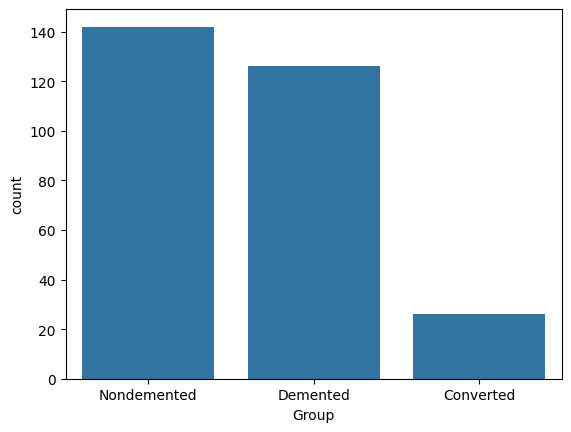

In [10]:
# Visualisation 1 - Barplot
# Check the distribution of the three groups (Demented, Non-demented, Converted)
sns.countplot(x='Group', data= df)
plt.show()

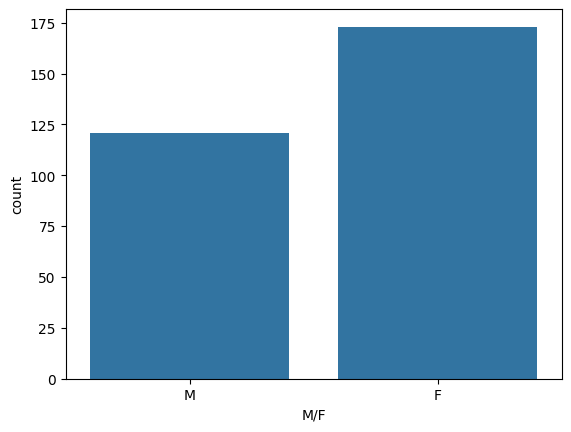

In [11]:
# Visualisation 2 - Barplot
# Check the distribution of the Genders (Male/Female)
sns.countplot(x='M/F', data=df)
plt.show()

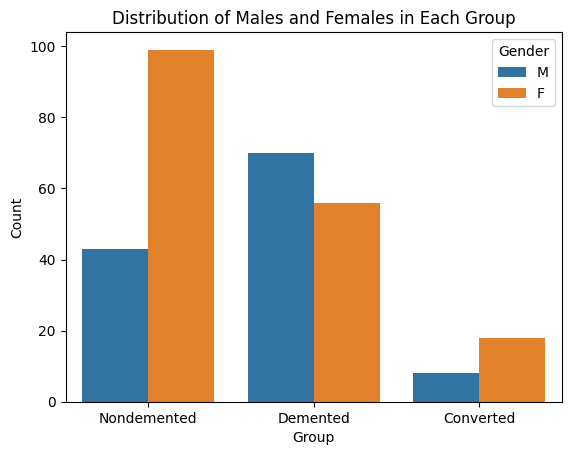

In [12]:
# Visualisation 3 - Barplot
# Bar chart to see the distribution of genders in each group.
fig, ax = plt.subplots()
sns.countplot(x='Group', hue='M/F', data=df, ax=ax)

plt.title('Distribution of Males and Females in Each Group')
plt.xlabel('Group')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.show()

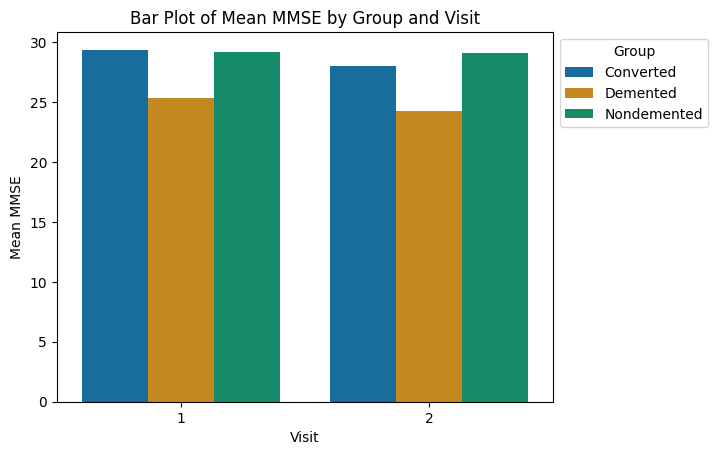

In [13]:
# Visualisation 4 - Barplot of Mean MMSE by Group and Visit
df_mean = df.groupby(['Group', 'Visit'])['MMSE'].mean().reset_index()

sns.barplot(data=df_mean, x='Visit', y='MMSE', hue='Group', palette='colorblind')
plt.xlabel('Visit')
plt.ylabel('Mean MMSE')
plt.title('Bar Plot of Mean MMSE by Group and Visit')
plt.legend(title='Group', bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

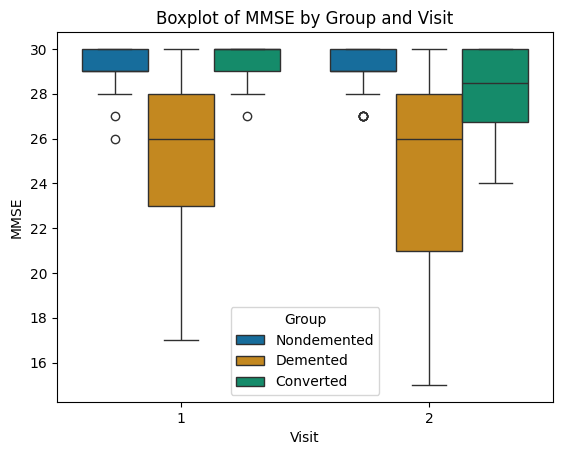

In [14]:
# Visualisation 5 - Boxplot of Mean MMSE by Group and Visit
sns.boxplot(data=df, x='Visit', y='MMSE', hue='Group', palette='colorblind')
plt.xlabel('Visit')
plt.ylabel('MMSE')
plt.title('Boxplot of MMSE by Group and Visit')
plt.legend(title='Group')
plt.show()

# Mixed Effects ANOVA

**Research Questions:**

1. Does the 'Group' variable (e.g., Nondemented vs. Demented) have a significant effect on cognitive performance (MMSE) across different visits?
2. Is there a significant difference in cognitive performance (MMSE) between males and females across different visits?


**Hypotheses:**

1. **Hypothesis for Question 1:**
   - Null Hypothesis (H0): There is no significant difference in MMSE scores among different groups (Nondemented vs. Demented) across visits.
   - Alternative Hypothesis (H1): There is a significant difference in MMSE scores among different groups across visits.

2. **Hypothesis for Question 2:**
   - Null Hypothesis (H0): There is no significant difference in MMSE scores between males and females across visits.
   - Alternative Hypothesis (H1): There is a significant difference in MMSE scores between males and females across visits.

In [15]:
# Two-way mixed-design ANOVA for research question 1
aov_1 = pg.mixed_anova(dv='MMSE', within='Visit', between='Group', subject='Subject ID', data=df)
pg.print_table(aov_1)


ANOVA SUMMARY

Source             SS    DF1    DF2       MS       F    p-unc    np2      eps
-----------  --------  -----  -----  -------  ------  -------  -----  -------
Group        1328.421      2    140  664.211  56.212    0.000  0.445  nan
Visit          22.378      1    140   22.378   8.859    0.003  0.060    1.000
Interaction    17.000      2    140    8.500   3.365    0.037  0.046  nan



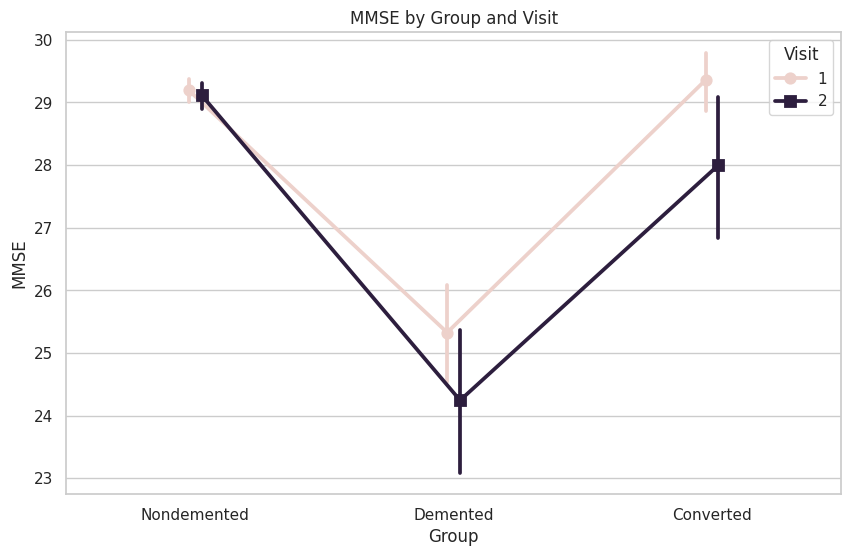

In [16]:
# Output plot of research question 1 mixed effects ANOVA
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
palette = sns.color_palette("colorblind")
sns.pointplot(data=df, x='Group', y='MMSE', hue='Visit', dodge=True, markers=['o', 's'])
plt.title('MMSE by Group and Visit')
plt.xlabel('Group')
plt.ylabel('MMSE')
plt.legend(title='Visit')
plt.show()

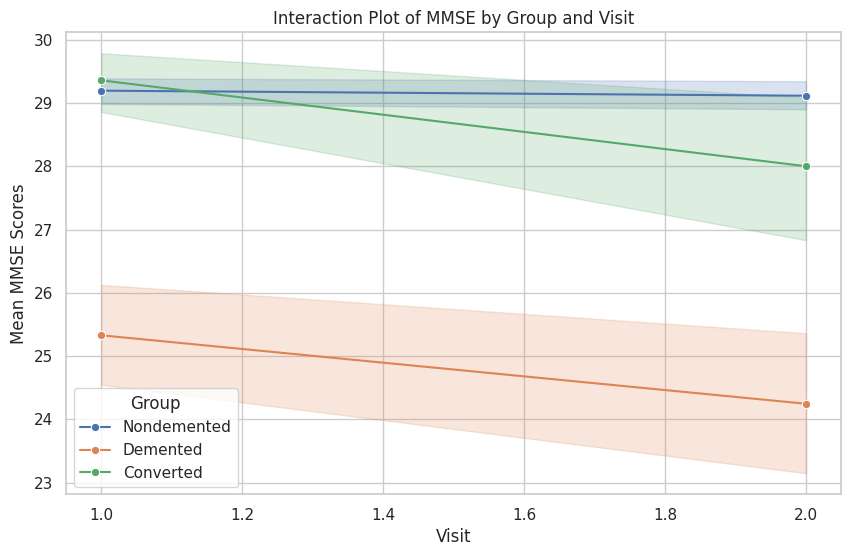

In [17]:
# Interaction plot to visualise the statistically significant interaction between group and visit
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Visit', y='MMSE', hue='Group', marker='o')
plt.xlabel('Visit')
plt.ylabel('Mean MMSE Scores')
plt.title('Interaction Plot of MMSE by Group and Visit')
plt.legend(title='Group')
plt.show()

In [18]:
# Two-way mixed-design ANOVA for research question 2
aov_2 = pg.mixed_anova(dv='MMSE', within='Visit', between='M/F', subject='Subject ID', data=df)
pg.print_table(aov_2)


ANOVA SUMMARY

Source           SS    DF1    DF2      MS      F    p-unc    np2      eps
-----------  ------  -----  -----  ------  -----  -------  -----  -------
M/F          88.689      1    141  88.689  4.321    0.039  0.030  nan
Visit        22.378      1    141  22.378  8.610    0.004  0.058    1.000
Interaction   4.173      1    141   4.173  1.606    0.207  0.011  nan



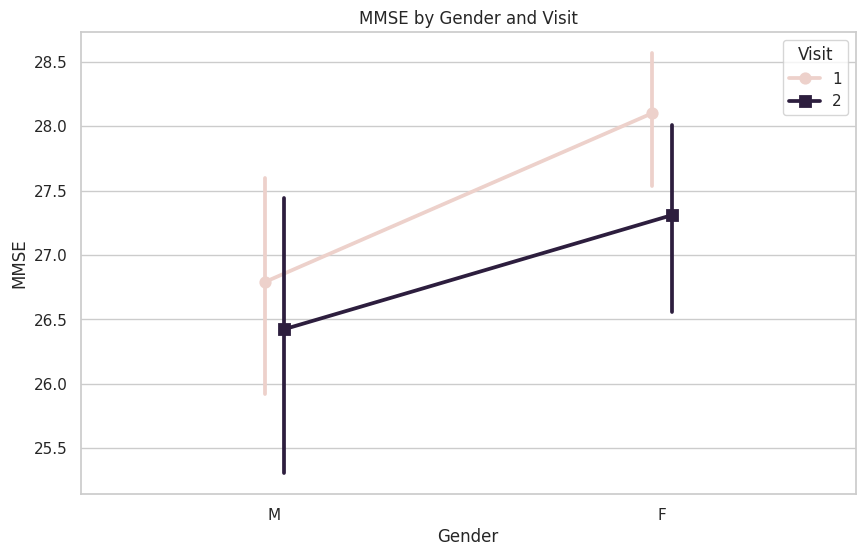

In [19]:
# Output plot of research question 2 mixed effects ANOVA
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
palette = sns.color_palette("colorblind")
sns.pointplot(data=df, x='M/F', y='MMSE', hue='Visit', dodge=True, markers=['o', 's'])
plt.title('MMSE by Gender and Visit')
plt.xlabel('Gender')
plt.ylabel('MMSE')
plt.legend(title='Visit')
plt.show()

# Assumption Checking

**Assumption 1 - Normality of Residuals**
- Shapiro-Wilk Test

In [20]:
# Model 1 (aov_1) for research question 1
pg.normality(data=df, dv='MMSE', group='Visit')

,W,pval,normal
Visit,,,
1,0.787462,1.761304e-13,False
2,0.760728,5.430693e-14,False


In [21]:
# Rounded to 2 decimal places
shapiro_test_1 = pg.normality(data=df, dv='MMSE', group='Visit')
shapiro_test_rounded = shapiro_test_1.round(2)

shapiro_test_rounded

,W,pval,normal
Visit,,,
1,0.79,0.0,False
2,0.76,0.0,False


In [22]:
# Model 2 (aov_2) for research question 2
pg.normality(data=df, dv='MMSE', group='M/F')

,W,pval,normal
M/F,,,
M,0.815468,5.106547e-11,False
F,0.738006,3.483865e-16,False


In [23]:
# Rounded to 2 decimal places
shapiro_test_2 = pg.normality(data=df, dv='MMSE', group='M/F')
shapiro_test_rounded = shapiro_test_2.round(2)

shapiro_test_rounded

,W,pval,normal
M/F,,,
M,0.82,0.0,False
F,0.74,0.0,False


**Assumption 2 - Homogeneity of Variances**
- Levene's Test
- Bartlett's Test

In [24]:
# Model 1 (aov_1) - Research Question 1
# Levene's test for homogeneity of variances
levene_test_1 = pg.homoscedasticity(data=df, dv='MMSE', group='Group', method='levene')
levene_test_1

,W,pval,equal_var
levene,NaN,NaN,False


In [25]:
# Bartlett's test for homogeneity of variances
bartlett_test_1 = pg.homoscedasticity(data=df, dv='MMSE', group='Group', method='bartlett')
bartlett_test_1

,T,pval,equal_var
bartlett,NaN,NaN,False


In [26]:
# Model 2 (aov_2) - Research Question 2
# Levene's test for homogeneity of variances
levene_test_2 = pg.homoscedasticity(data=df, dv='MMSE', group='M/F', method='levene')
levene_test_2

,W,pval,equal_var
levene,NaN,NaN,False


In [27]:
# Bartlett's test for homogeneity of variances
bartlett_test_2 = pg.homoscedasticity(data=df, dv='MMSE', group='M/F', method='bartlett')
bartlett_test_2

,T,pval,equal_var
bartlett,NaN,NaN,False


# Post-Hoc Tests

In [28]:
# Posthoc tests for research question 1
posthocs_1 = pg.pairwise_ttests(dv='MMSE', within='Visit', between='Group',
                              subject='Subject ID', data=df)
pg.print_table(posthocs_1)

/usr/local/lib/python3.10/dist-packages/pingouin/pairwise.py:28: UserWarning: pairwise_ttests is deprecated, use pairwise_tests instead.
  warnings.warn("pairwise_ttests is deprecated, use pairwise_tests instead.", UserWarning)



POST HOC TESTS

Contrast       Visit    A          B            Paired    Parametric         T      dof  alternative      p-unc                BF10    hedges
-------------  -------  ---------  -----------  --------  ------------  ------  -------  -------------  -------  ------------------  --------
Visit          -        1          2            True      True           2.928  142.000  two-sided        0.004               5.530     0.162
Group          -        Converted  Demented     False     True           6.739   51.065  two-sided        0.000         2036000.000     1.167
Group          -        Converted  Nondemented  False     True          -1.303   12.315  two-sided        0.216               0.599    -0.584
Group          -        Demented   Nondemented  False     True          -9.449   64.318  two-sided        0.000  22070000000000.000    -1.754
Visit * Group  1        Converted  Demented     False     True           8.012   60.516  two-sided        0.000       318700000.000

In [29]:
# Posthoc tests for research question 2
posthocs_2 = pg.pairwise_ttests(dv='MMSE', within='Visit', between='M/F',
                              subject='Subject ID', data=df)
pg.print_table(posthocs_2)


POST HOC TESTS

Contrast     Visit    A    B    Paired    Parametric        T      dof  alternative      p-unc    BF10    hedges
-----------  -------  ---  ---  --------  ------------  -----  -------  -------------  -------  ------  --------
Visit        -        1    2    True      True          2.928  142.000  two-sided        0.004   5.530     0.162
M/F          -        F    M    False     True          1.990  104.517  two-sided        0.049   1.098     0.351
Visit * M/F  1        F    M    False     True          2.633  104.908  two-sided        0.010   4.138     0.464
Visit * M/F  2        F    M    False     True          1.319  106.117  two-sided        0.190   0.402     0.232



/usr/local/lib/python3.10/dist-packages/pingouin/pairwise.py:28: UserWarning: pairwise_ttests is deprecated, use pairwise_tests instead.
  warnings.warn("pairwise_ttests is deprecated, use pairwise_tests instead.", UserWarning)


# Power Analysis

power = 0.91

alpha = 0.05

effect size = 0.7

In [30]:
# Computing the appropriate sample size to achieve desired power
power_analysis = TTestIndPower()
effect_size = 0.7
alpha = 0.05
power = 0.91
sample_size = power_analysis.solve_power(effect_size=effect_size, alpha=alpha, power=power)
print("Appropriate Sample Size: ", sample_size)

Appropriate Sample Size:  45.45073088568012


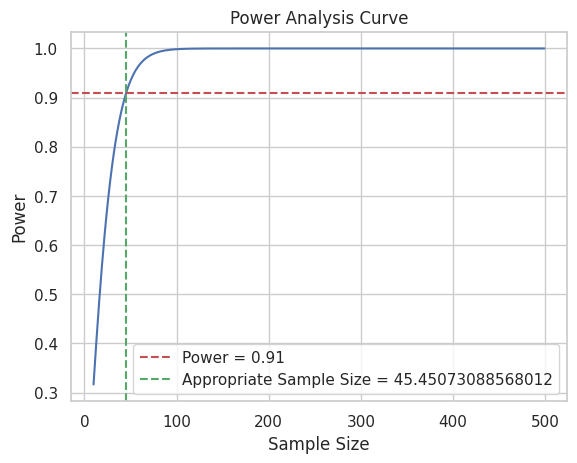

In [33]:
# Plotting power curves
sample_sizes = range(10, 500)
powers = []
for n in sample_sizes:
    powers.append(power_analysis.solve_power(effect_size=effect_size, nobs1=n, alpha=alpha))

plt.plot(sample_sizes, powers)
plt.xlabel('Sample Size')
plt.ylabel('Power')
plt.title('Power Analysis Curve')
plt.axhline(y=power, color='r', linestyle='--', label=f'Power = {power}')
plt.axvline(x=sample_size, color='g', linestyle='--', label=f'Appropriate Sample Size = {sample_size}')
plt.legend()
plt.show()

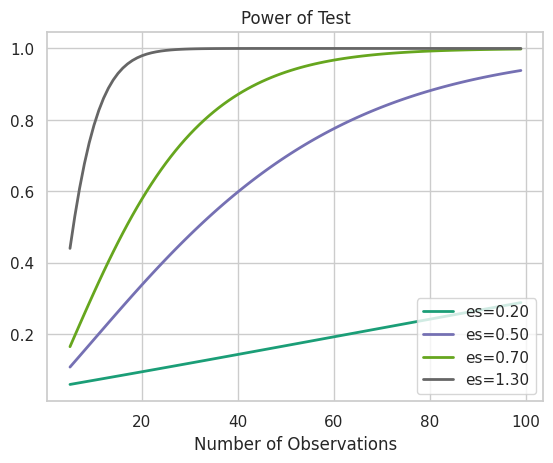

In [34]:
# power analysis varying effect sizes
effect_sizes = np.array([0.2, 0.5, 0.7,1.3])
sample_sizes = np.array(range(5, 100))

obj = TTestIndPower()
obj.plot_power(dep_var='nobs', nobs=sample_sizes,
			effect_size=effect_sizes)

plt.show()